In [14]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from myheatmap import myheatmap

import matplotlib
print(matplotlib.__version__) # version 3 required for cmap='twilight_shifted'

sns.set_context('poster') # makes text larger

Vivaflag = True  ## Mac vs PC

if Vivaflag:
    base = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group'
    savefolder = os.path.join(base,r'Papers and Abstracts\Coupled Resonator Spatial Imaging\Figures\python_exports')
    
    #folder = os.path.join(base,r"Projects\GrapheneCoupledResonators\Data\Sample2\2019\2019\08\09")
    folder = r'C:\Users\vhorowit\Desktop\tempdata\2019-08-09'
else:
    savefolder = '/Volumes/Aleman-Lab/Group/Papers and Abstracts/Coupled Resonator Spatial Imaging/Figures/python_exports'
    folder = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample2/2019/2019/08/09/'
        
def maskplot(df, mk, column, uselog=False, cbarlims = None, **kwargs):
    ### cbarlims is not implemented yet.
#    try:
    rlogmkname = column + 'logmk'
    rmkname = column + 'mk'
    df[rlogmkname] = np.log10(df[column][mk]) 
    df[rmkname] = df[column][mk]

    if uselog:
        values = rlogmkname
    else:
        values = rmkname
    dfgrid = df.pivot_table(index = 'Y um', columns = 'X um', values = values).sort_index(axis = 0, ascending = False)
    myheatmap(dfgrid, values, **kwargs)
    plt.xlabel(u'$x$ (μm)')
    plt.ylabel(u'$y$ (μm)')
    plt.gca().axis('equal')
    
    
    """    except: # If the column name has already been used, just make up a random number for a column name.
        import random
        rmkname = str(random.randint(1,1000))
        rlogmkname = rmkname + rmkname
        df[rlogmkname] = np.log10(df[column][mk]) 
        df[rmkname] = df[column][mk]"""

3.1.2


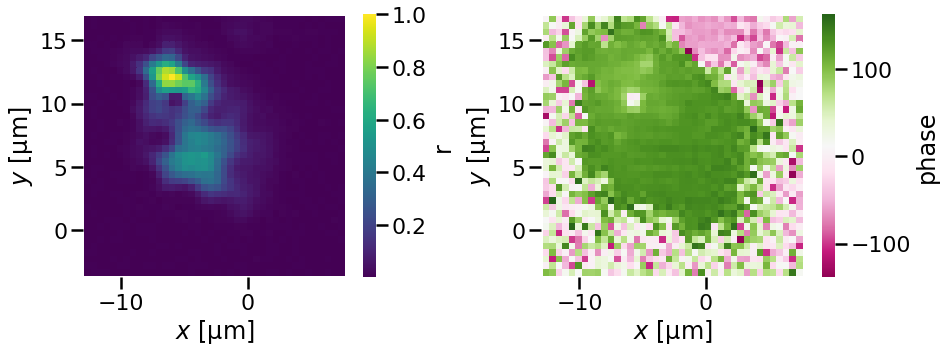

In [2]:
file1 = 'PosGU01Array01.00r0.5p3Array01.00r0.5p3Device1.2Drum_15.16MHz_1104325' 
path = os.path.join(folder,file1)
df = pd.read_csv(os.path.join(path, 'Demod1.csv'), skiprows = 2) 
#print(df) 

df.phase = np.rad2deg(df.phase)
df.r = df.r/df.r.max()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

#plt.suptitle(file + '\n\n');

plt.sca(ax1)
df['rlog'] = np.log10(df.r) 
df['X um']=df['Green X']
df['Y um']= df['Green Y']
amp1 = df.pivot_table(index = 'Y um', columns = 'X um', values = 'r').sort_index(axis = 0, ascending = False) 
myheatmap(amp1, 'r', cmap = 'viridis');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
plt.gca().axis('equal')



plt.sca(ax2)
df['rlog'] = np.log10(df.r) 
df['X um']=df['Green X']
df['Y um']= df['Green Y']
phase1 = df.pivot_table(index = 'Y um', columns = 'X um', values = 'phase').sort_index(axis = 0, ascending = False) 
myheatmap(phase1, 'phase', cmap='PiYG');
ax2.axis('equal');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
plt.tight_layout();

(array([  6.,   5.,  14.,   7.,   6.,   2.,   2.,   2.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   7.,   4.,   6.,   2.,   7.,
         15.,  23.,  30.,  44.,  41.,  53.,  66., 111., 101.,  53.,  29.,
          3.,   2.,   1.,   2.,   1.]),
 array([-69.20528345, -65.33501119, -61.46473894, -57.59446668,
        -53.72419442, -49.85392217, -45.98364991, -42.11337765,
        -38.2431054 , -34.37283314, -30.50256088, -26.63228862,
        -22.76201637, -18.89174411, -15.02147185, -11.1511996 ,
         -7.28092734,  -3.41065508,   0.45961717,   4.32988943,
          8.20016169,  12.07043395,  15.9407062 ,  19.81097846,
         23.68125072,  27.55152297,  31.42179523,  35.29206749,
         39.16233974,  43.032612  ,  46.90288426,  50.77315652,
         54.64342877,  58.51370103,  62.38397329,  66.25424554,
         70.12

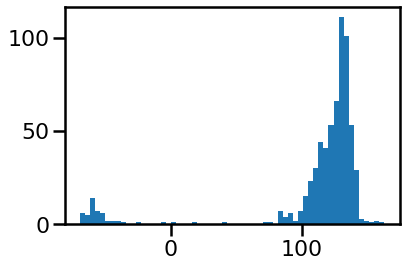

In [3]:
mk = df.r > 0.01
plt.hist(df.phase[mk], bins=60)

C:\Users\vhorowit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log10


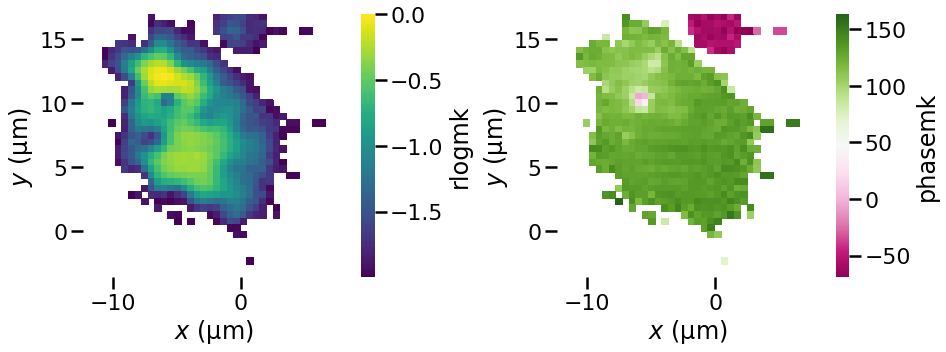

In [4]:
mk = df.r > 0.01

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

#plt.suptitle(file + '\n\n');

plt.sca(ax1)
maskplot(df, mk, 'r', uselog=True, cmap = 'viridis')


plt.sca(ax2)
maskplot(df, mk, 'phase', uselog=False, cmap='PiYG')

plt.tight_layout();

C:\Users\vhorowit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vhorowit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vhorowit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log10


125.04954452286657
-52.449229049178314


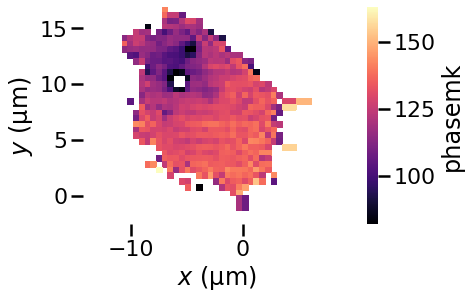

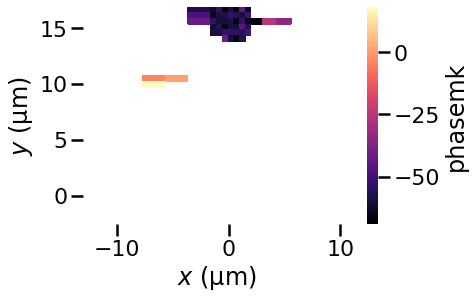

In [5]:
mask100 = df[mk].phase > 80
maskm100 = df[mk].phase < 20

maskplot(df[mk], mask100, 'phase',)
plt.figure()
maskplot(df[mk], maskm100, 'phase', )

print (df[mk][mask100].phase.mean())
print (df[mk][maskm100].phase.mean())

C:\Users\vhorowit\Desktop\tempdata\2019-08-09\PosGU01Array01.00r0.5p3Array01.00r0.5p3Device1.2Drum1_15.5MHz105133\Demod1.csv


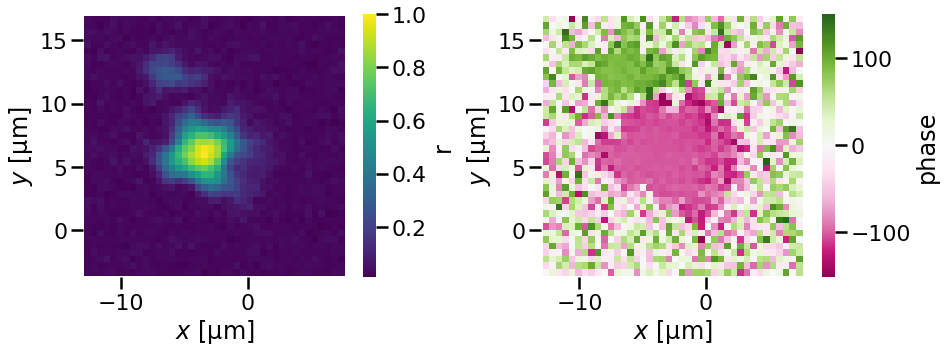

In [6]:
file2 = r'PosGU01Array01.00r0.5p3Array01.00r0.5p3Device1.2Drum1_15.5MHz105133' 
path = os.path.join(folder,file2)
print(os.path.join(path, 'Demod1.csv'))
df = pd.read_csv(os.path.join(path, 'Demod1.csv'), skiprows = 2) 
#print(df) 

df.phase = np.rad2deg(df.phase)
df.r = df.r/df.r.max()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

#plt.suptitle(file + '\n\n');

plt.sca(ax1)
df['rlog'] = np.log10(df.r) 
df['X um']=df['Green X']
df['Y um']= df['Green Y']
amp1 = df.pivot_table(index = 'Y um', columns = 'X um', values = 'r').sort_index(axis = 0, ascending = False) 
myheatmap(amp1, 'r', cmap = 'viridis');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax1.axis('equal')




plt.sca(ax2)
df['rlog'] = np.log10(df.r) 
df['X um']=df['Green X']
df['Y um']= df['Green Y']
phase1 = df.pivot_table(index = 'Y um', columns = 'X um', values = 'phase').sort_index(axis = 0, ascending = False) 
myheatmap(phase1, 'phase', cmap='PiYG');
ax2.axis('equal');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
plt.tight_layout();



C:\Users\vhorowit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log10


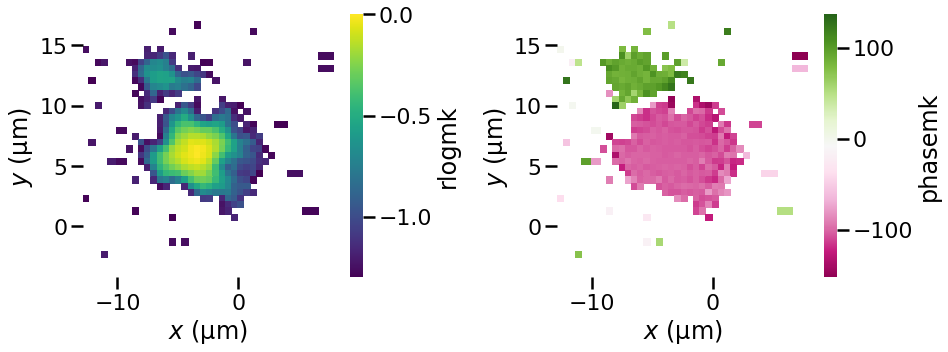

In [7]:
mk = df.r > 0.05

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

#plt.suptitle(file + '\n\n');

plt.sca(ax1)
maskplot(df, mk, 'r',True, cmap = 'viridis')



plt.sca(ax2)
maskplot(df, mk, 'phase',False, cmap='PiYG')

plt.tight_layout();

(array([  2.,   2.,   1.,   3.,   1.,   3.,   5.,  10.,  31.,  49., 102.,
         27.,  13.,   5.,   4.,   3.,   2.,   0.,   2.,   0.,   1.,   0.,
          1.,   1.,   0.,   0.,   1.,   1.,   2.,   0.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   2.,   2.,
          3.,   0.,   2.,   3.,   5.,  16.,  15.,  13.,   8.,   2.,   3.,
          3.,   1.,   4.,   0.,   1.]),
 array([-152.44656777, -147.63001237, -142.81345696, -137.99690156,
        -133.18034615, -128.36379075, -123.54723534, -118.73067994,
        -113.91412454, -109.09756913, -104.28101373,  -99.46445832,
         -94.64790292,  -89.83134751,  -85.01479211,  -80.1982367 ,
         -75.3816813 ,  -70.56512589,  -65.74857049,  -60.93201508,
         -56.11545968,  -51.29890427,  -46.48234887,  -41.66579346,
         -36.84923806,  -32.03268266,  -27.21612725,  -22.39957185,
         -17.58301644,  -12.76646104,   -7.94990563,   -3.13335023,
           1.68320518,    6.49976058,   11.316

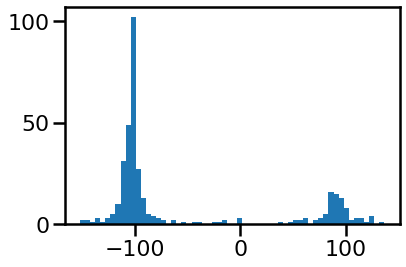

In [8]:
mk = df.r > 0.05
plt.hist(df.phase[mk], bins=60)

In [9]:
mask100 = df[mk].phase > 50
maskm100 = df[mk].phase < -50

print (df[mk][mask100].phase.mean())
print (df[mk][maskm100].phase.mean())

92.20931764314878
-103.93149964271869


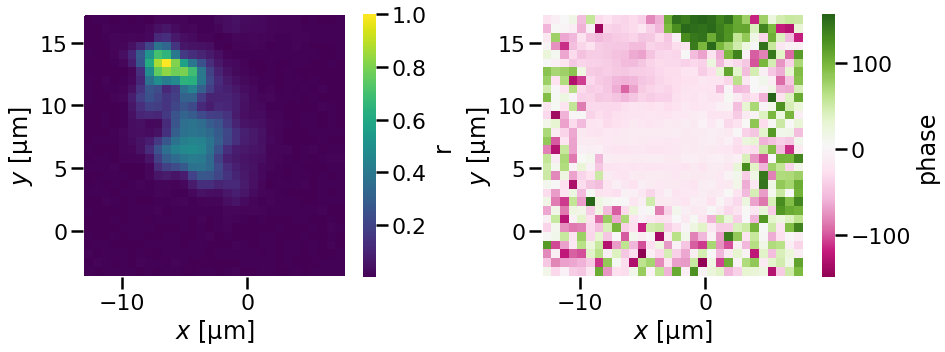

In [10]:
if Vivaflag:
    folder3 = os.path.join(base, 'Projects/GrapheneCoupledResonators/Data/Sample2/2019/08/01/')
else:
    folder3 = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample2/2019/08/01/'
file3 = 'PosGU01Array01.00r0.5p3Device1.2Drum1_15.7Hz_120336' 
path = os.path.join(folder3,file3)

df = pd.read_csv(os.path.join(path, 'Demod1.csv'), skiprows = 2) 
#print(df) 

df.phase = np.rad2deg(df.phase)
df.r = df.r/df.r.max()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

#plt.suptitle(file + '\n\n');

plt.sca(ax1)
df['rlog'] = np.log10(df.r) 
df['X um']=df['Green X']
df['Y um']= df['Green Y']
amp1 = df.pivot_table(index = 'Y um', columns = 'X um', values = 'r').sort_index(axis = 0, ascending = False) 
myheatmap(amp1, 'r', cmap = 'viridis');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
ax1.axis('equal')


plt.sca(ax2)
df['rlog'] = np.log10(df.r) 
df['X um']=df['Green X']
df['Y um']= df['Green Y']
phase1 = df.pivot_table(index = 'Y um', columns = 'X um', values = 'phase').sort_index(axis = 0, ascending = False) 
myheatmap(phase1, 'phase', cmap='PiYG');
ax2.axis('equal');
plt.xlabel(u'$x$ [μm]')
plt.ylabel(u'$y$ [μm]')
plt.tight_layout();

C:\Users\vhorowit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log10


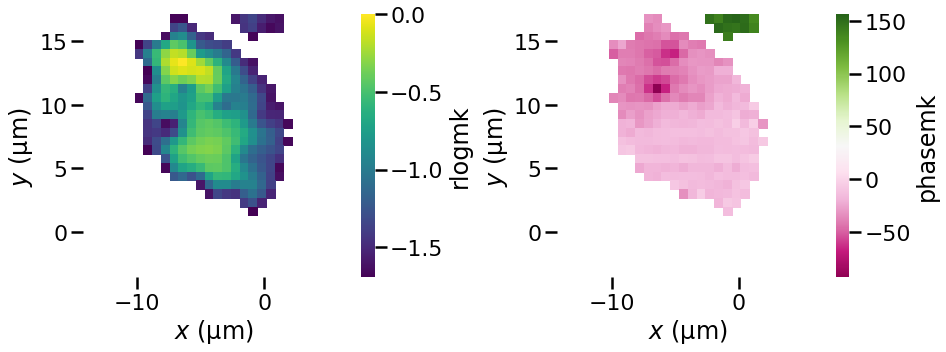

In [11]:
mk = df.r > 0.02

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.23,5))

#plt.suptitle(file + '\n\n');

plt.sca(ax1)
maskplot(df, mk, 'r',True, cmap = 'viridis')


plt.sca(ax2)
maskplot(df, mk, 'phase',False, cmap = 'PiYG')


plt.tight_layout();

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  1.,  7.,  3., 16., 21.,
        13., 25., 10., 15., 37., 57., 41., 11.,  3.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  2.,  1.,  4.,  3.]),
 array([-93.11921496, -88.96708298, -84.81495099, -80.662819  ,
        -76.51068701, -72.35855502, -68.20642303, -64.05429104,
        -59.90215905, -55.75002706, -51.59789508, -47.44576309,
        -43.2936311 , -39.14149911, -34.98936712, -30.83723513,
        -26.68510314, -22.53297115, -18.38083916, -14.22870718,
        -10.07657519,  -5.9244432 ,  -1.77231121,   2.37982078,
          6.53195277,  10.68408476,  14.83621675,  18.98834874,
         23.14048072,  27.29261271,  31.4447447 ,  35.59687669,
         39.74900868,  43.90114067,  48.05327266,  52.20540465,
         56.35753664,  60.50966862,  64.66180061,  68.8139326 ,
         72.966064

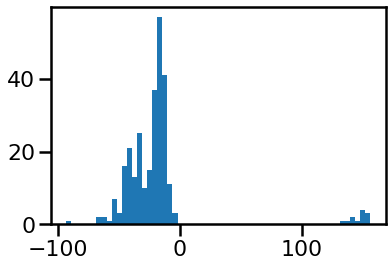

In [12]:
mk = df.r > 0.02
plt.hist(df.phase[mk], bins=60)

In [13]:
mask100 = df[mk].phase > 100
maskm100 = df[mk].phase < 0

print (df[mk][mask100].phase.mean())
print (df[mk][maskm100].phase.mean())

147.09441399474926
-25.51728551971882
